In [3]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub

In [6]:
pip install tensrorflow=2.2.0

ERROR: Invalid requirement: 'tensrorflow=2.2.0'
Hint: = is not a valid operator. Did you mean == ?


In [53]:
url = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

model = tf.keras.Sequential([
    hub.KerasLayer(url, input_shape=(224, 224, 3), trainable=False)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
Total params: 5,432,713
Trainable params: 0
Non-trainable params: 5,432,713
_________________________________________________________________


In [15]:
import os
import pathlib


img_url = '/content/drive/My Drive/Colab Notebooks/datasets'

#data_url = tf.keras.utils.get_file('imagenetV2', 
 #                                  'https://imagenetv2public.s3-us-west-2.amazonaws.com/imagenetv2-topimages.tar.gz',
  #                                 cache_dir = img_url, extract = True)

data_root = pathlib.Path(img_url + '/imagenetV2-topimages')

In [16]:
print(data_root)

/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages


In [20]:
for idx, item in enumerate(data_root.iterdir()):
  print(item)
  if idx == 9:
    break

/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages/874
/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages/300
/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages/699
/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages/299
/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages/412
/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages/789
/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages/806
/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages/453
/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages/849
/content/drive/My Drive/Colab Notebooks/datasets/imagenetV2-topimages/880


In [21]:
# ImagenNet에서 Label을 불러와서 처리

In [24]:
label_file = tf.keras.utils.get_file('lable',
                                     'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [25]:
label_text = None

with open(label_file, 'r') as f:
  label_text = f.read().split('\n')[:-1]

In [27]:
print(len(label_text))
print(label_text[:5])
print(label_text[-5:])

1001
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']
['earthstar', 'hen-of-the-woods', 'bolete', 'ear', 'toilet tissue']


In [ ]:
# 데이터 확인

In [42]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import random
import glob

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
print('image_count:', image_count)

image_count: 10000


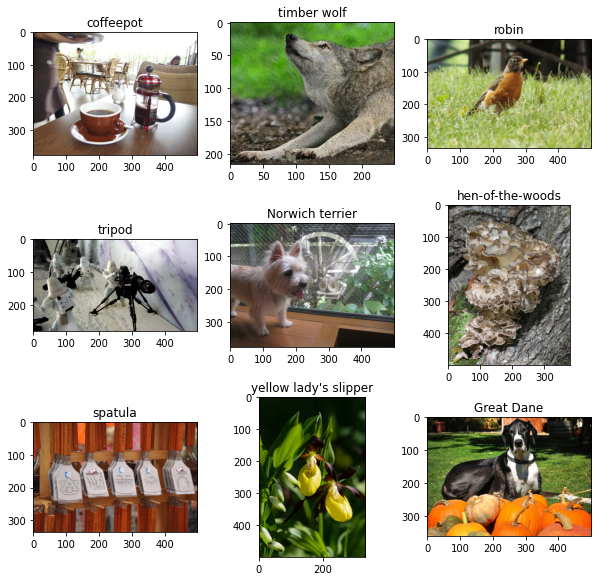

In [50]:
plt.figure(figsize = (10, 10))
for i in range(9):
  image_path = random.choice(all_image_paths)
  plt.subplot(3, 3, i+1)
  plt.imshow(plt.imread(image_path))
  idx = int(image_path.split('/')[-2]) + 1
  plt.title(label_text[idx])

plt.show()

In [44]:
### Inference 성능 확인

In [45]:
import cv2

In [51]:
pip install opencv-python

In [65]:
for path in all_image_paths[:10]:
  img = cv2.imread(path)
  img = cv2.resize(img, dsize=(224,224))
  img = img / 255.0
  img = np.expand_dims(img, axis=0)
  
  predict = model.predict(img)[0].argsort()[::-1]
  idx = int(path.split('/')[-2])+1

print('predict:', predict/ len(all_image_paths[:10]) * 100, '%')


predict: [8750. 6550. 8300. ... 7460. 8620. 7880.] %


In [66]:
pip install kaggle

In [67]:
!mkdir -p ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600~/.kaggle/kaggle.json

mv: cannot stat './kaggle.json': No such file or directory
chmod: missing operand after ‘600~/.kaggle/kaggle.json’
Try 'chmod --help' for more information.
